In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle
from sklearn.datasets import make_blobs
sns.set_style("whitegrid")

# K-means Clustering Algorithm

K-means is one of the simplest and most popular unsupervised machine learning algorithms. This notebook demonstrates how K-means works step by step, with visualizations to help understand:

1. Centroid initialization
2. Point assignment to nearest centroid
3. Centroid update based on mean of assigned points
4. Convergence process

The algorithm alternates between these steps until convergence or maximum iterations are reached.

In [34]:
def generate_data(n_samples=300, n_centers=3, random_state=42):
    np.random.seed(random_state)
    X, _ = make_blobs(n_samples=n_samples, centers=n_centers, random_state=random_state)
    return X

def visualize_kmeans_step(X, centroids, labels=None, iteration=0, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 8))
    
    # Plot data points
    colors = sns.color_palette("tab10", n_colors=len(centroids))
    if labels is not None:
        for i in range(len(centroids)):
            mask = labels == i
            ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.6, label=f'Cluster {i+1}')
    else:
        ax.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6, label='Data points')
    
    # Plot centroids with surrounding circles
    for i, centroid in enumerate(centroids):
        ax.scatter(centroid[0], centroid[1], c=colors[i], marker='o', s=200, 
                  edgecolor='black', linewidth=1.5, label=f'Centroid {i+1}')
    
    ax.set_title(f'K-means Iteration {iteration}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return ax

In [35]:
class KMeans:
    """
    K-means clustering algorithm implementation.
    
    Parameters:
    -----------
    n_clusters : int
        Number of clusters to form
    max_iters : int, optional (default=100)
        Maximum number of iterations to perform
    random_state : int, optional
        Random seed for reproducibility
    """
    def __init__(self, n_clusters, max_iters=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.inertia_ = None  # Sum of squared distances to closest centroid
        
    def initialize_centroids(self, X):
        """Initialize centroids randomly from data points."""
        np.random.seed(self.random_state)
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[idx].copy()
    
    def assign_clusters(self, X, centroids):
        """Assign each point to nearest centroid."""
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def update_centroids(self, X, labels):
        """Update centroids as mean of assigned points."""
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            if np.sum(labels == k) > 0:  # avoid empty clusters
                centroids[k] = np.mean(X[labels == k], axis=0)
        return centroids
    
    def compute_inertia(self, X, labels, centroids):
        """Compute sum of squared distances to closest centroids."""
        distances = np.sqrt(((X - centroids[labels])**2).sum(axis=1))
        return np.sum(distances**2)
    
    def fit(self, X, visualization=True):
        """
        Fit K-means clustering to the data.
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data
        visualization : bool
            Whether to visualize each iteration
        """
        # Initialize centroids
        self.centroids_ = self.initialize_centroids(X)
        self.inertia_history_ = []
        
        # Main loop
        for i in range(self.max_iters):
            # Assign points to nearest centroids
            old_centroids = self.centroids_.copy()
            self.labels_ = self.assign_clusters(X, self.centroids_)
            
            # Update centroids
            self.centroids_ = self.update_centroids(X, self.labels_)
            
            # Calculate inertia
            self.inertia_ = self.compute_inertia(X, self.labels_, self.centroids_)
            self.inertia_history_.append(self.inertia_)
            
            if visualization:
                # Clear and update cluster plot
                visualize_kmeans_step(X, self.centroids_, self.labels_, i+1)
                
                plt.tight_layout()
                plt.pause(0.5)
            
            # Check convergence
            if np.allclose(old_centroids, self.centroids_, rtol=1e-4):
                break
        
        return self

/var/folders/jg/c62rdl3n2dg4nc748pybnk1c0000gn/T/ipykernel_24164/2004041151.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.6, label=f'Cluster {i+1}')
/var/folders/jg/c62rdl3n2dg4nc748pybnk1c0000gn/T/ipykernel_24164/2004041151.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(centroid[0], centroid[1], c=colors[i], marker='o', s=200,


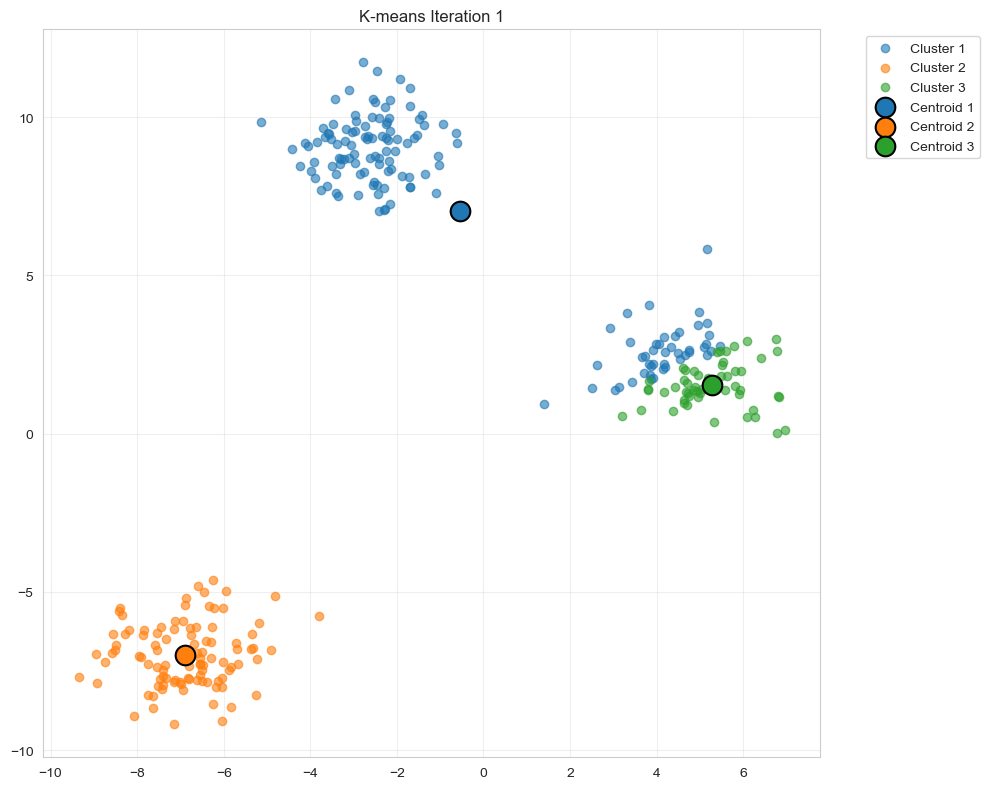

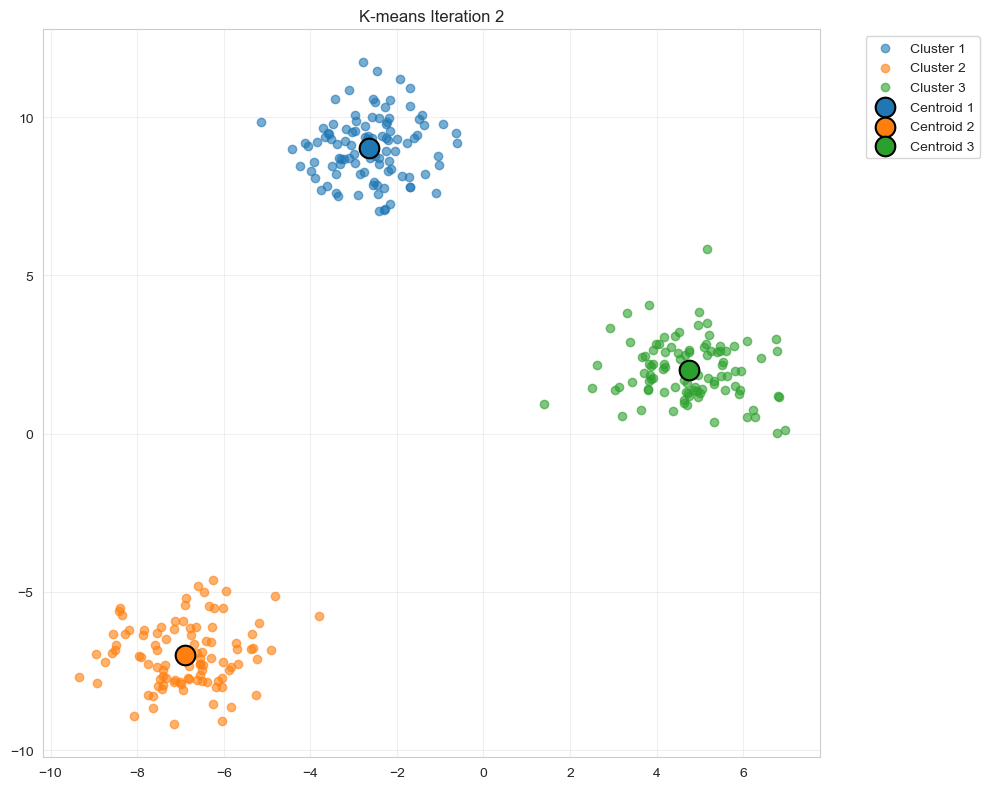

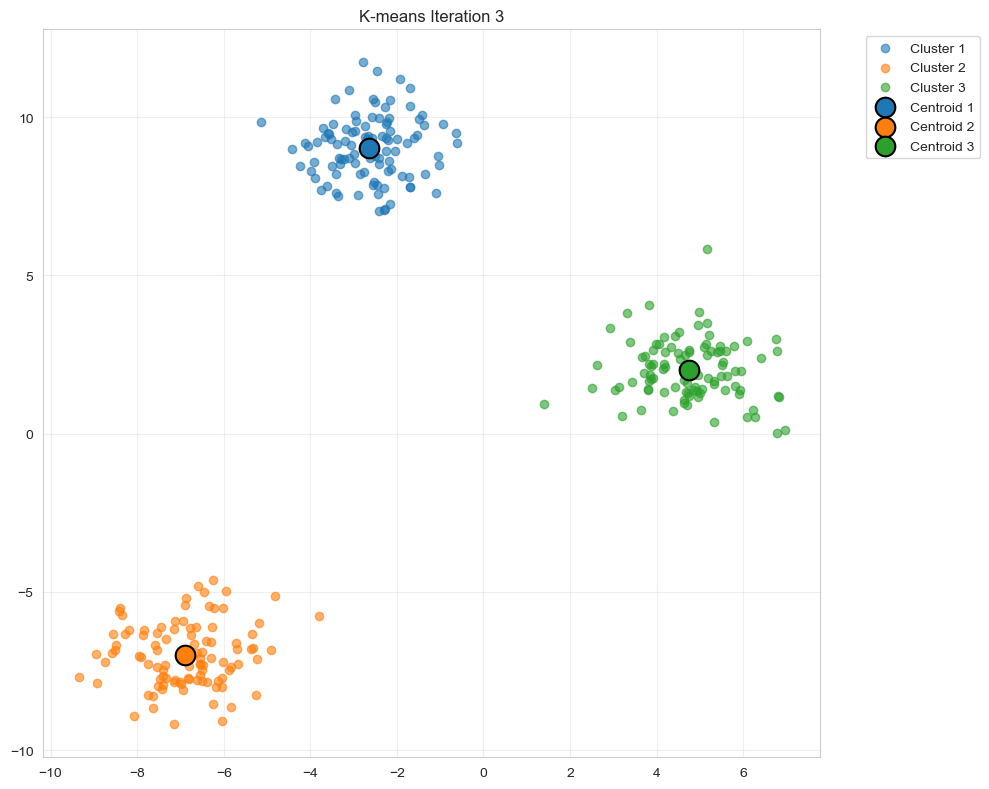

<Figure size 1000x800 with 0 Axes>

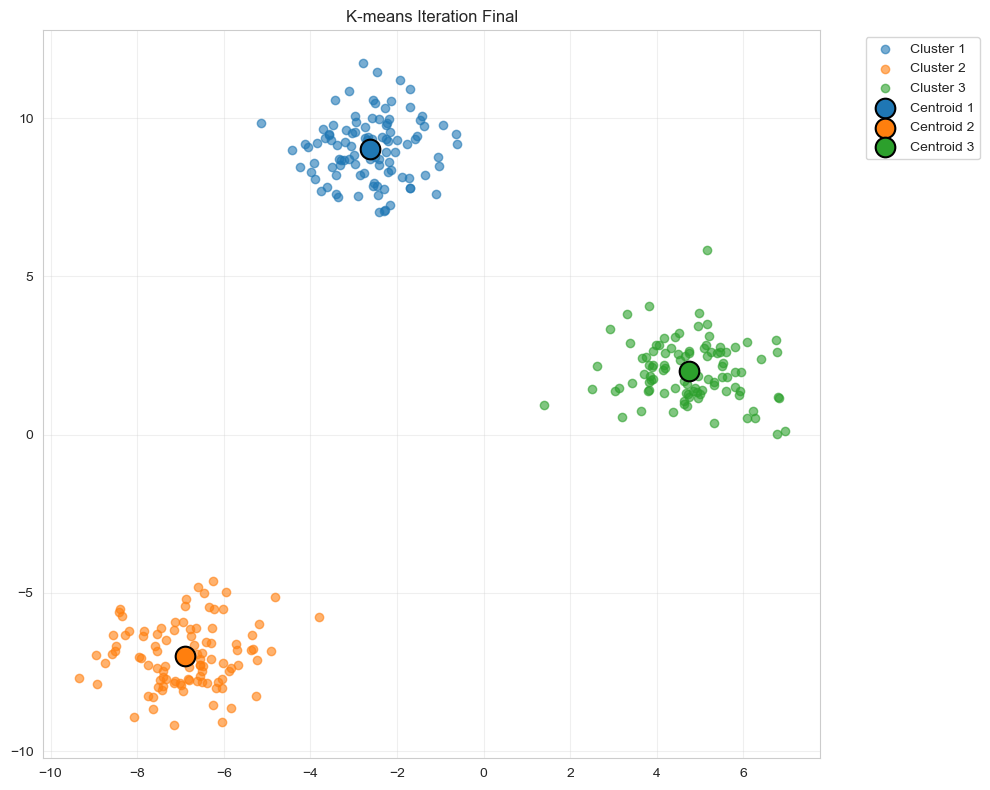

In [36]:
# Generate synthetic data
X = generate_data(n_samples=300, n_centers=3, random_state=42)

# Create and fit K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X, visualization=True)

# Final plot
plt.figure(figsize=(10, 8))
visualize_kmeans_step(X, kmeans.centroids_, kmeans.labels_, iteration="Final")
plt.show()